<H1>Fetch Data Analyst Take Home Assignment</H1>

<H2>Data Exploration</H2>

In [1]:
#Importing the necessary Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

<H3>Users Table</H3>

In [2]:
#Importing the users table
users = pd.read_csv("USER_TAKEHOME.csv")
users.head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female


In [3]:
# Checking the information of the dataset
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            100000 non-null  object
 1   CREATED_DATE  100000 non-null  object
 2   BIRTH_DATE    96325 non-null   object
 3   STATE         95188 non-null   object
 4   LANGUAGE      69492 non-null   object
 5   GENDER        94108 non-null   object
dtypes: object(6)
memory usage: 4.6+ MB


Based on the Entity relationship model, we know the expected data types for the users table

We know that all columns are of "object" or "string" data type. The two date columns need to be converted to the right data type

In [4]:
#Converting the date columns to their respective datatypes
users['CREATED_DATE'] = pd.to_datetime(users['CREATED_DATE'], errors ="coerce")
users['BIRTH_DATE'] = pd.to_datetime(users['BIRTH_DATE'], errors = "coerce")
users.info()
users.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   ID            100000 non-null  object             
 1   CREATED_DATE  100000 non-null  datetime64[ns, UTC]
 2   BIRTH_DATE    96325 non-null   datetime64[ns, UTC]
 3   STATE         95188 non-null   object             
 4   LANGUAGE      69492 non-null   object             
 5   GENDER        94108 non-null   object             
dtypes: datetime64[ns, UTC](2), object(4)
memory usage: 4.6+ MB


(100000, 6)

In [5]:
users.head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54+00:00,2000-08-11 00:00:00+00:00,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55+00:00,2001-09-24 04:00:00+00:00,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18+00:00,1994-10-28 00:00:00+00:00,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22+00:00,NaT,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50+00:00,1972-03-19 00:00:00+00:00,PA,en,female


Once the data types are as expected, we will go over each column to examine the missing values, unique values, value counts, empty strings and distribution of the data.

**ID**

In [6]:
# 1. Missing Values:

users['ID'].isnull().sum()/len(users)

0.0

In [7]:
# 2. Unique Values:

users['ID'].nunique() # Number of unique values

100000

In [8]:
# 3. Value Counts and Frequencies:

# Not needed in this case as all values in the column are unique 

In [9]:
# 4. Empty Strings:
(users['ID'] == "").sum()

0

In [10]:
# 5. Distribution:

# Not needed in this case as all values in the column are unique

**Observation:**

No visible errors in the first glance

**CREATED_DATE**

In [11]:
# 1. Missing Values:

users['CREATED_DATE'].isnull().sum()/len(users)

0.0

In [12]:
# 2. Unique Values:

users['CREATED_DATE'].nunique() # Number of unique values

99942

In [13]:
# 3. Value Counts and Frequencies:
 
users['CREATED_DATE'].value_counts(dropna=False)  # Include NaN in counts

2023-01-12 18:30:15+00:00    2
2019-08-28 02:21:44+00:00    2
2024-04-11 02:56:41+00:00    2
2024-03-11 17:03:02+00:00    2
2024-02-25 20:43:59+00:00    2
                            ..
2024-08-25 03:30:41+00:00    1
2021-03-12 13:08:04+00:00    1
2024-07-24 19:33:12+00:00    1
2020-12-01 05:25:08+00:00    1
2020-03-25 01:30:30+00:00    1
Name: CREATED_DATE, Length: 99942, dtype: int64

In [14]:
# 4. Empty Strings:
 
# Not needed in this case

In [15]:
# 5. Distribution:

# Not needed in this case as all values in the column are unique

**Observation:**

No visible errors in the first glance

**BIRTH_DATE**

In [16]:
# 1. Missing Values:

users['BIRTH_DATE'].isnull().sum()/len(users)

0.03675

**Observation:**

Large number of missing values (3%). Birth dates are often used as a key demographic variable in many analyses. If 3% of our data is missing, it can introduce bias into our results.

In [17]:
# 2. Unique Values:

users['BIRTH_DATE'].nunique() # Number of unique values

54721

In [18]:
# 3. Value Counts and Frequencies:
 
users['BIRTH_DATE'].value_counts(dropna=False)  # Include NaN in counts

NaT                          3675
1970-01-01 00:00:00+00:00    1272
1979-12-11 08:00:00+00:00      63
2000-12-12 00:00:00+00:00      28
2000-12-31 00:00:00+00:00      23
                             ... 
2004-02-21 08:00:00+00:00       1
1956-02-09 05:00:00+00:00       1
1974-07-13 00:00:00+00:00       1
1991-05-23 04:00:00+00:00       1
1995-06-09 04:00:00+00:00       1
Name: BIRTH_DATE, Length: 54722, dtype: int64

**Observation:**

1. A large number (2.3%) of birth dates are set to the default value of "1970-01-01 00:00:00+00:00"
2. There are a few dates that appear more frequently than others, but still significantly less than the missing values or the default date. These might represent actual common birth dates or could also indicate data entry patterns or system-related factors.

In [19]:
# 4. Empty Strings:

# Not needed in this case

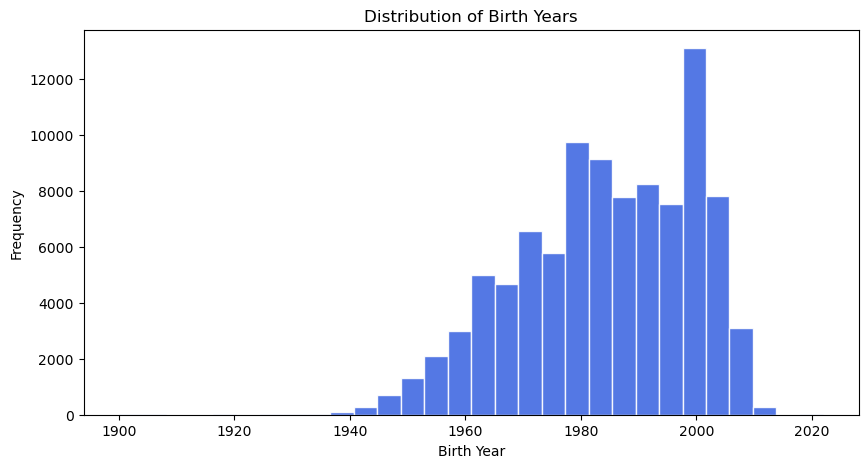

In [20]:
# 5. Distribution:

birth_years = users['BIRTH_DATE'].dt.year.dropna() #Extract years, and drop NaT values.
plt.figure(figsize=(10, 5))
plt.hist(birth_years, bins=30, color='royalblue', edgecolor='white', alpha=0.9)
plt.title("Distribution of Birth Years")
plt.xlabel("Birth Year")
plt.ylabel("Frequency")
plt.show()

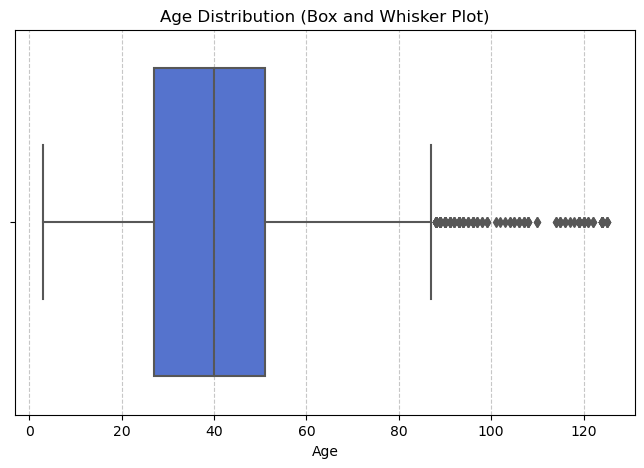

In [21]:
# Age distrubution

today = date.today()
users["AGE"] = today.year - users["BIRTH_DATE"].dt.year

plt.figure(figsize=(8, 5))
sns.boxplot(x=users['AGE'].dropna(), color="royalblue")


plt.xlabel("Age")
plt.title("Age Distribution (Box and Whisker Plot)")
plt.grid(axis='x', linestyle='--', alpha=0.7)


plt.show()

**Observation**

The overall birth date distribution is a right-skewed distribution which means that there are more younger users than older ones. The box and whisker plot for user age tells us that the median age is 40 with an interquartile range of ~25 to ~50. The whiskers extend from ~3 to ~85 years with some outliers that extend beyond 100 years. This shows us potential data entry errors which reduces the validity of data.

In [22]:
# Due to the above findings, I will mark the outliers to see how my results change when the outliers are included vs when they are not

Q1 = users["AGE"].quantile(0.25)
Q3 = users["AGE"].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create an 'Outlier_Flag' column
users['Outlier_Flag'] = np.where((users["AGE"] < lower_bound) | (users["AGE"] > upper_bound), 1, 0)
users['Outlier_Flag'] = np.where((users["AGE"] < lower_bound) |(users["AGE"] > upper_bound) | (users["BIRTH_DATE"] == pd.to_datetime('1970-01-01')), 1, 0)

# Display flagged outliers
users.head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER,AGE,Outlier_Flag
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54+00:00,2000-08-11 00:00:00+00:00,CA,es-419,female,25.0,0
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55+00:00,2001-09-24 04:00:00+00:00,PA,en,female,24.0,0
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18+00:00,1994-10-28 00:00:00+00:00,FL,es-419,female,31.0,0
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22+00:00,NaT,NC,en,NaN,NaN,0
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50+00:00,1972-03-19 00:00:00+00:00,PA,en,female,53.0,0


**STATE**

In [23]:
# 1. Missing Values:

users['STATE'].isnull().sum()/len(users)

0.04812

**Observation**

4.8% of the values are missing and might be a problem if we are doing a state-wise analysis

In [24]:
# 2. Unique Values:

users['STATE'].nunique() # Number of unique values

52

In [25]:
# 3. Value Counts and Frequencies:
 
users['STATE'].value_counts(dropna=False)  # Include NaN in counts

TX     9028
FL     8921
CA     8589
NY     5703
NaN    4812
IL     3794
GA     3718
PA     3644
OH     3519
NC     3399
NJ     2899
MI     2582
VA     2400
IN     2213
TN     2165
AL     1792
SC     1773
KY     1731
AZ     1728
MO     1652
MD     1636
MA     1523
WI     1389
PR     1361
LA     1290
WA     1234
CO     1139
MN     1125
CT     1110
OK     1100
AR     1011
MS      960
IA      933
NV      837
KS      835
OR      700
WV      674
UT      593
DE      492
NE      487
NM      452
ME      368
NH      359
HI      350
ID      350
AK      297
RI      284
DC      241
SD      205
ND      185
MT      169
WY      138
VT      111
Name: STATE, dtype: int64

In [26]:
# 4. Empty Strings:

# Can see from the unique values that there are no empty strings

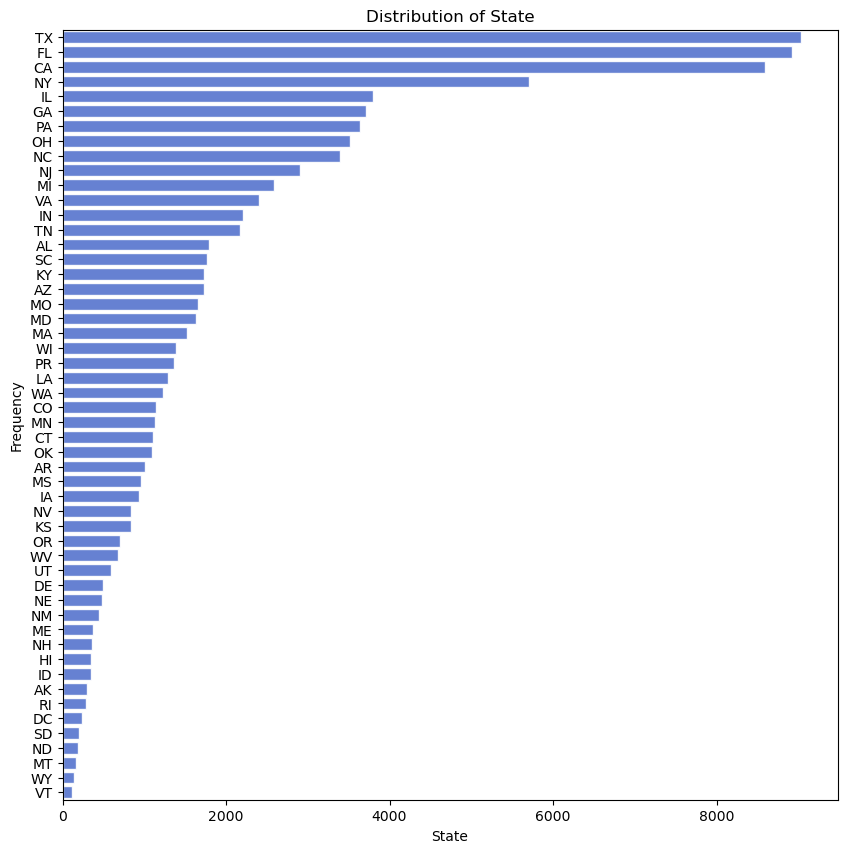

In [27]:
# 5. Distribution:

plt.figure(figsize=(10, 10))
state_counts = users['STATE'].value_counts(dropna=True)
sns.countplot(y=users['STATE'], order=state_counts.index, color='royalblue', edgecolor='white', alpha=0.9)
plt.title("Distribution of State")
plt.xlabel("State")
plt.ylabel("Frequency")
plt.show()

**LANGUAGE**

In [28]:
# 1. Missing Values:

users['LANGUAGE'].isnull().sum()/len(users)

0.30508

**Observation:**

30% of the data is missing. It is a significant problem for when we will have to use this column, and it raises serious concerns about data quality and potential biases

In [29]:
# 2. Unique Values:

users['LANGUAGE'].nunique() # Number of unique values

2

In [30]:
# 3. Value Counts and Frequencies:
 
users['LANGUAGE'].value_counts(dropna=False)  # Include NaN in counts

en        63403
NaN       30508
es-419     6089
Name: LANGUAGE, dtype: int64

Language code es-419 is Spanish

In [31]:
# 4. Empty Strings:

# No Empty Strings

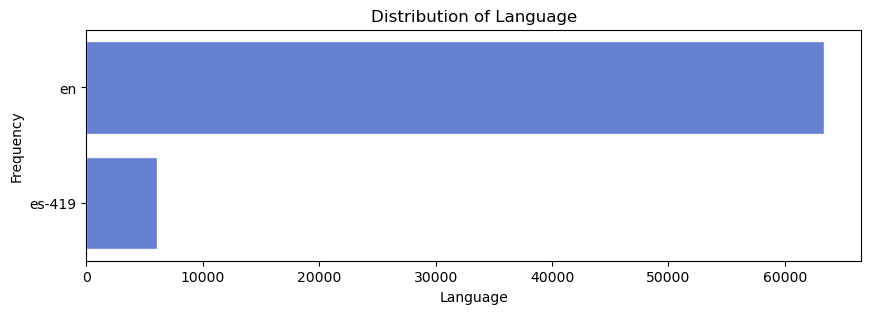

In [32]:
# 5. Distribution:

plt.figure(figsize=(10, 3))
lang_counts = users['LANGUAGE'].value_counts(dropna=True)
sns.countplot(y=users['LANGUAGE'], order=lang_counts.index, color='royalblue', edgecolor='white', alpha=0.9)
plt.title("Distribution of Language")
plt.xlabel("Language")
plt.ylabel("Frequency")
plt.show()

**GENDER**

In [33]:
# 1. Missing Values:

users['GENDER'].isnull().sum()/len(users)

0.05892

5.8% of the data is missing. It is a significant problem for when we will have to use this column, and it raises serious concerns about data quality and potential biases

In [34]:
# 2. Unique Values:

users['GENDER'].nunique() # Number of unique values

11

In [35]:
# 3. Value Counts and Frequencies:
 
users['GENDER'].value_counts(dropna=False)  # Include NaN in counts

female                    64240
male                      25829
NaN                        5892
transgender                1772
prefer_not_to_say          1350
non_binary                  473
unknown                     196
not_listed                  180
Non-Binary                   34
not_specified                28
My gender isn't listed        5
Prefer not to say             1
Name: GENDER, dtype: int64

**Observation**

There are redundant gender types such as 'not_listed' and "My gender isn't listed", "Prefer not to say" and "prefer_not_to_say". For the sake of this exercise, we can bucket - "nan", "unknown","not_specified" into a single category and "not_listed" and "My gender isn't listed" into a single category. 

Merging these categories will practically help clean up our dataset and make our dataset easier to work with

In [36]:
#Replacing redundancy in gender values
users["GENDER"] = users["GENDER"].replace({"My gender isn't listed":"not_listed", "Prefer not to say":"not_specified",
                                           "prefer_not_to_say":"not_specified",
                                           "unknown":"not_specified", "Non-Binary":"non_binary"})
users['GENDER'].fillna("not_specified", inplace = True)
users["GENDER"].unique()

array(['female', 'not_specified', 'male', 'non_binary', 'transgender',
       'not_listed'], dtype=object)

In [37]:
# 4. Empty Strings:

# Handled

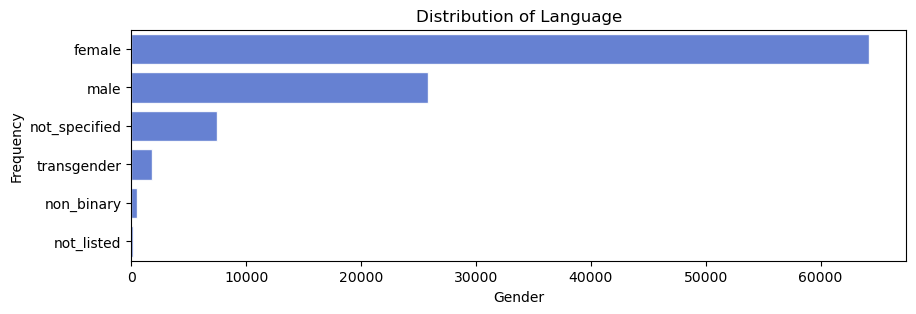

In [38]:
# 5. Distribution:

plt.figure(figsize=(10, 3))
gender_counts = users['GENDER'].value_counts(dropna=True)
sns.countplot(y=users['GENDER'], order=gender_counts.index, color='royalblue', edgecolor='white', alpha=0.9)
plt.title("Distribution of Language")
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.show()

In [39]:
users.to_csv("Users_Cleaned.csv", index=False)

<h3>Products Table</h3>

In [40]:
#Importing the products table
products = pd.read_csv("PRODUCTS_TAKEHOME.csv")
products.head()

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11


In [41]:
# Checking the information of the dataset
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845552 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CATEGORY_1    845441 non-null  object 
 1   CATEGORY_2    844128 non-null  object 
 2   CATEGORY_3    784986 non-null  object 
 3   CATEGORY_4    67459 non-null   object 
 4   MANUFACTURER  619078 non-null  object 
 5   BRAND         619080 non-null  object 
 6   BARCODE       841527 non-null  float64
dtypes: float64(1), object(6)
memory usage: 45.2+ MB


Based on the Entity relationship model, we know the expected data types for the products table

We know that all columns are of "object" or "string" data type and the barcode column is float type. 

In [42]:
products.shape

(845552, 7)

We will now go over each column to examine the missing values, unique values, value counts, empty strings and distribution of the data.

**CATEGORY_1**

In [43]:
# 1. Missing Values:

products['CATEGORY_1'].isnull().sum()/len(products)

0.00013127519064469128

In [44]:
# 2. Unique Values:

products['CATEGORY_1'].nunique() # Number of unique values

27

In [45]:
# 3. Value Counts and Frequencies:
 
products['CATEGORY_1'].value_counts(dropna=False)  # Include NaN in counts

Health & Wellness         512695
Snacks                    324817
Beverages                   3990
Pantry                       871
Apparel & Accessories        846
Dairy                        602
Needs Review                 547
Alcohol                      503
Home & Garden                115
NaN                          111
Restaurant                    69
Deli & Bakery                 69
Frozen                        62
Meat & Seafood                49
Sporting Goods                47
Office & School               45
Toys & Games                  28
Household Supplies            24
Produce                       20
Animals & Pet Supplies        16
Arts & Entertainment           7
Electronics                    5
Mature                         3
Vehicles & Parts               3
Baby & Toddler                 3
Beauty                         2
Media                          2
Luggage & Bags                 1
Name: CATEGORY_1, dtype: int64

In [46]:
# 4. Empty Strings:

# No empty strings

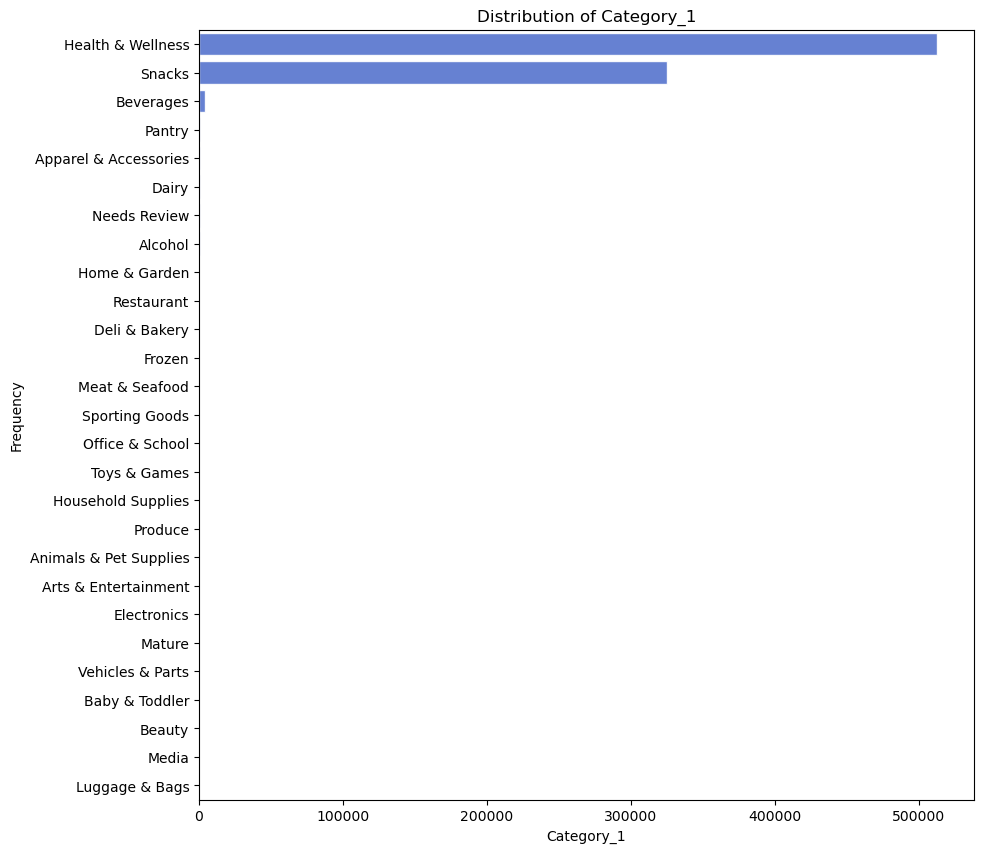

In [47]:
# 5. Distribution:

plt.figure(figsize=(10, 10))
cat1_counts = products['CATEGORY_1'].value_counts(dropna=True)
sns.countplot(y=products['CATEGORY_1'], order=cat1_counts.index, color='royalblue', edgecolor='white', alpha=0.9)
plt.title("Distribution of Category_1")
plt.xlabel("Category_1")
plt.ylabel("Frequency")
plt.show()

**Observation:**

No major visible errors in the first glance

**CATEGORY_2**

In [48]:
# 1. Missing Values:

products['CATEGORY_2'].isnull().sum()/len(products)

0.001684106950252616

In [49]:
# 2. Unique Values:

products['CATEGORY_2'].nunique() # Number of unique values

121

In [50]:
# 3. Value Counts and Frequencies:
 
products['CATEGORY_2'].value_counts(dropna=False)  # Include NaN in counts

Candy                      121036
Hair Care                  111482
Medicines & Treatments      99118
Bath & Body                 81469
Skin Care                   62587
                            ...  
Games                           1
Vehicle Storage & Cargo         1
Audio                           1
Pasta & Noodles                 1
Baby Transport                  1
Name: CATEGORY_2, Length: 122, dtype: int64

In [51]:
# 4. Empty Strings:

(products['CATEGORY_2'] == "").sum()

0

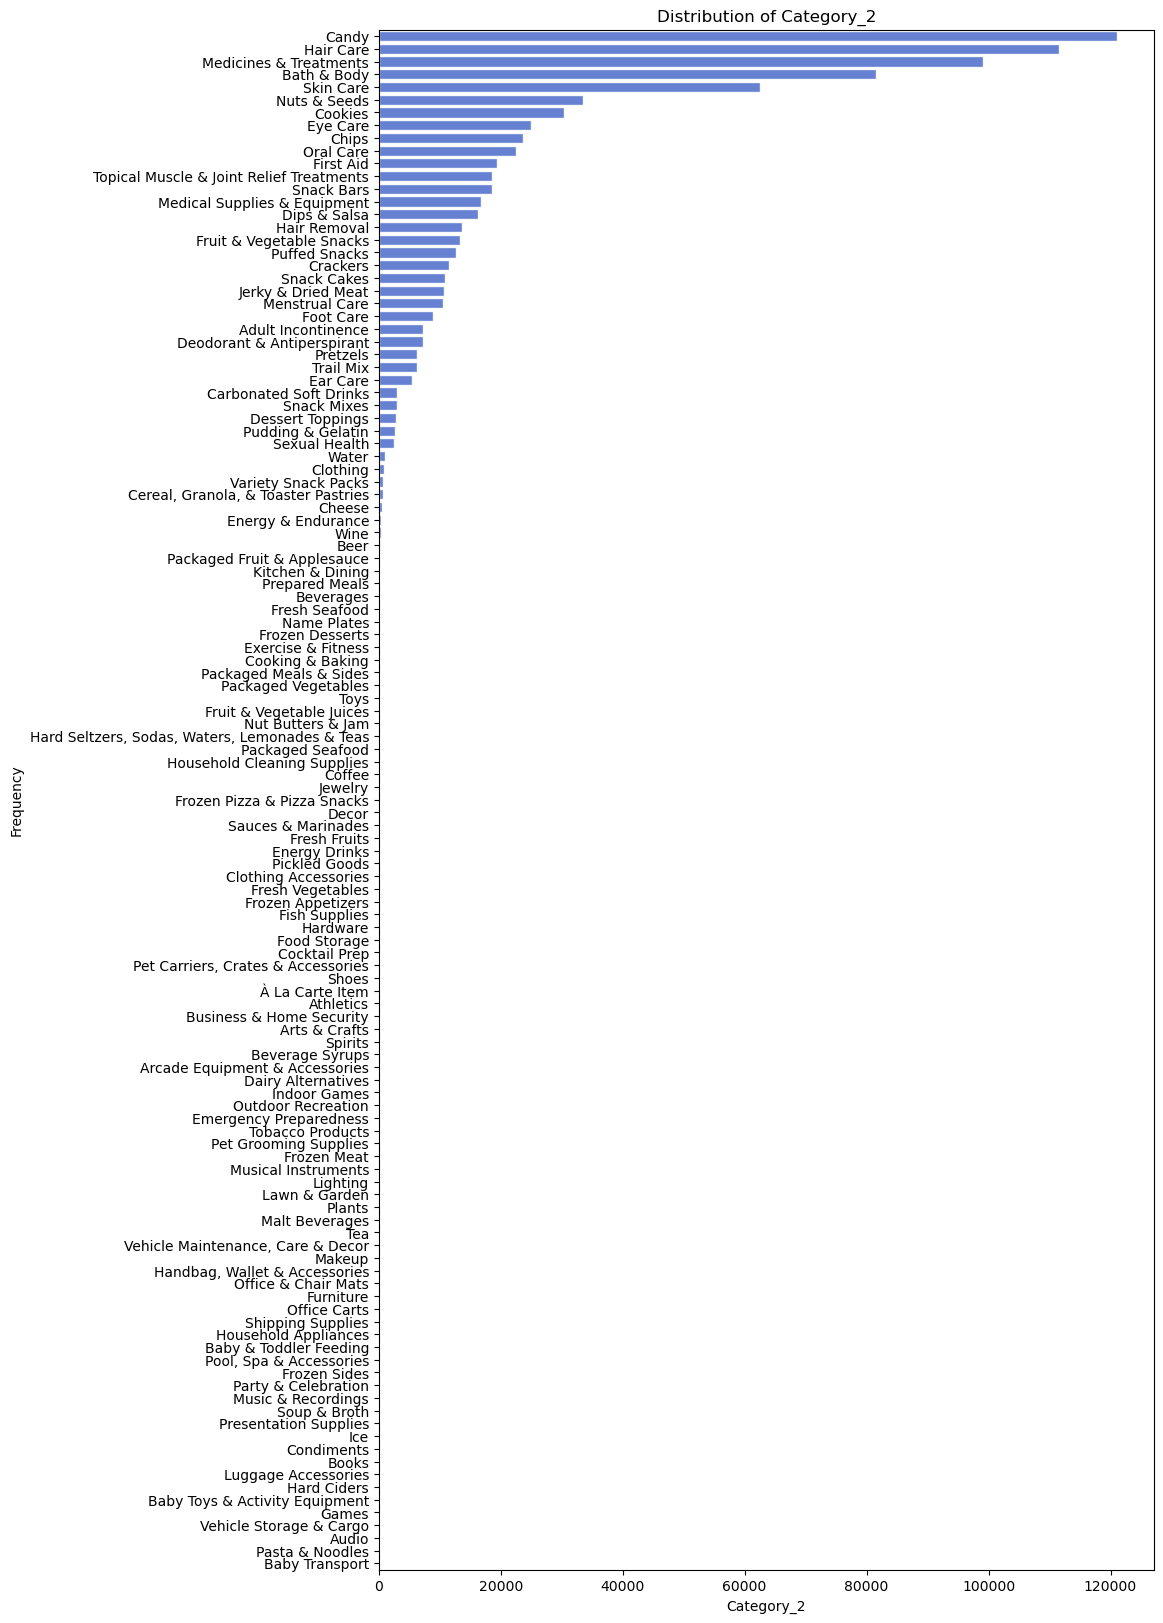

In [52]:
# 5. Distribution:

plt.figure(figsize=(10, 20))
cat2_counts = products['CATEGORY_2'].value_counts(dropna=True)
sns.countplot(y=products['CATEGORY_2'], order=cat2_counts.index, color='royalblue', edgecolor='white', alpha=0.9)
plt.title("Distribution of Category_2")
plt.xlabel("Category_2")
plt.ylabel("Frequency")
plt.show()

**Observation:**

No major visible errors in the first glance

**CATEGORY_3**

In [53]:
# 1. Missing Values:

products['CATEGORY_3'].isnull().sum()/len(products)

0.07162894771699434

**Observation**

7% of the data is missing. It is a significant problem for when we will have to use this column, and it raises serious concerns about data quality and potential biases

In [54]:
# 2. Unique Values:

products['CATEGORY_3'].nunique() # Number of unique values

344

In [55]:
# 3. Value Counts and Frequencies:
 
products['CATEGORY_3'].value_counts(dropna=False)  # Include NaN in counts

NaN                              60566
Confection Candy                 56965
Vitamins & Herbal Supplements    55700
Chocolate Candy                  47710
Hair Styling Products            20450
                                 ...  
Outdoor Living                       1
Fuel Containers & Tanks              1
Beans                                1
Chair & Sofa Cushions                1
Baby Carriers                        1
Name: CATEGORY_3, Length: 345, dtype: int64

In [56]:
# 4. Empty Strings:

(products['CATEGORY_3'] == "").sum()

0

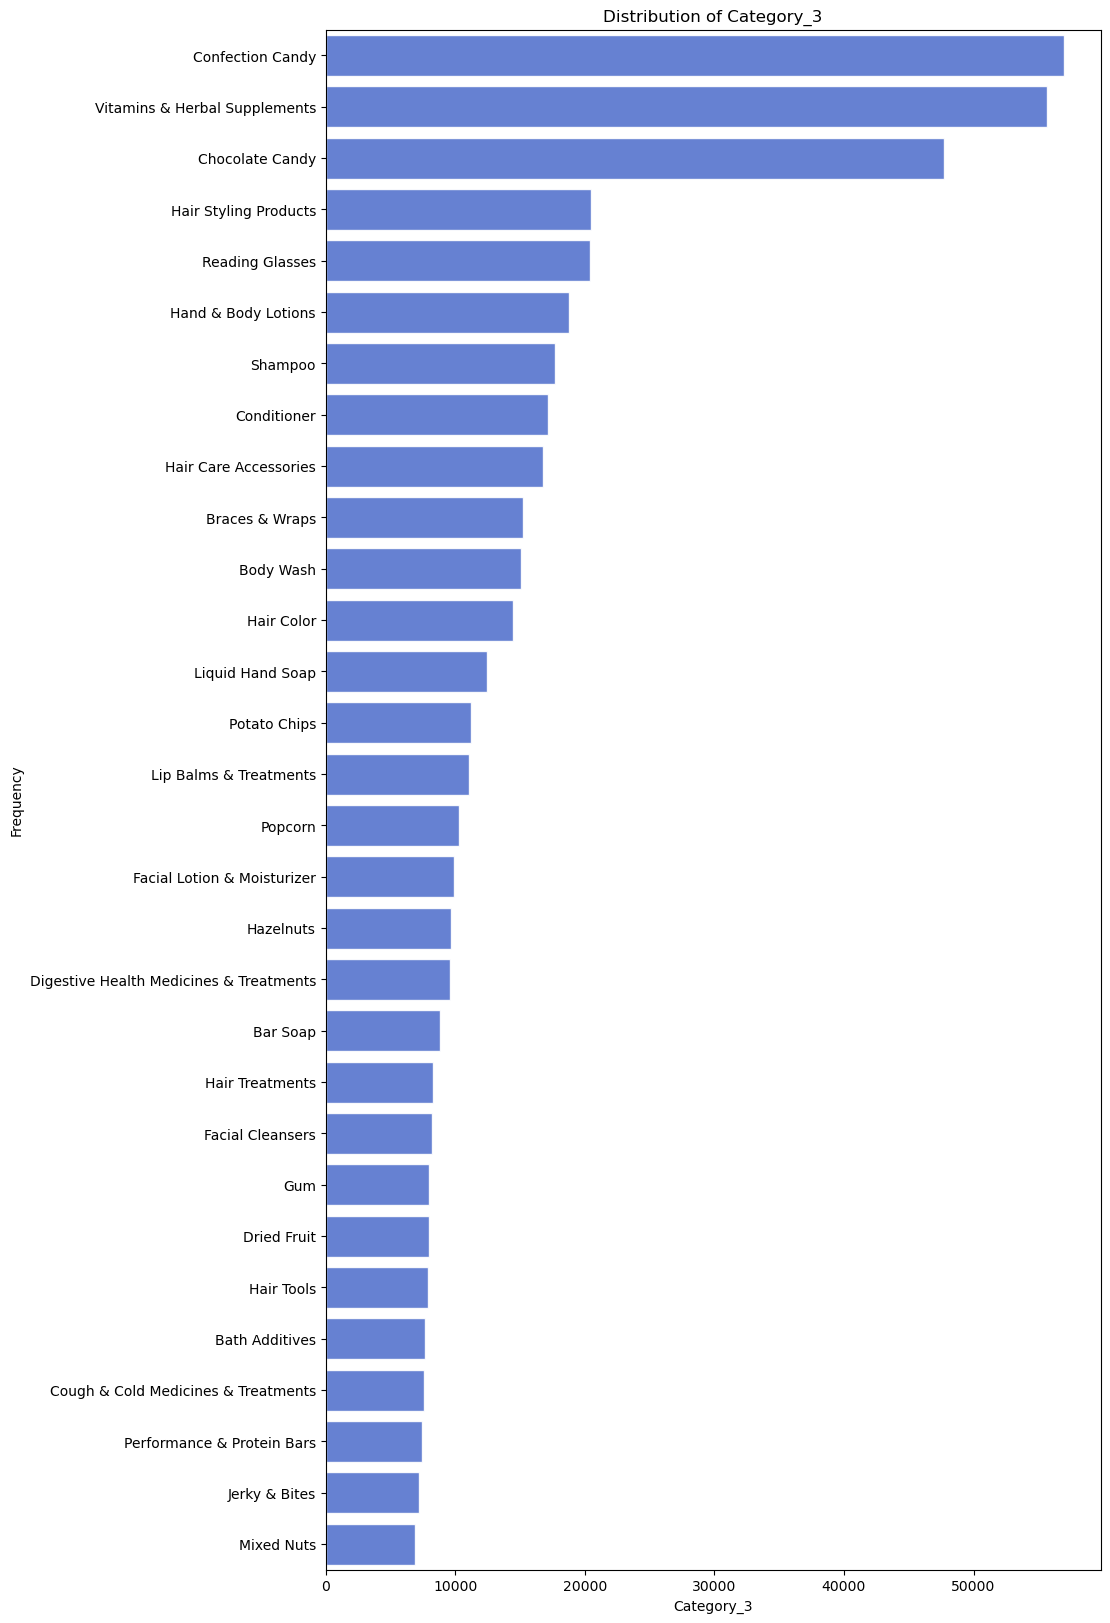

In [57]:
# 5. Distribution:

# Checking distribution for the top 30 categories

plt.figure(figsize=(10, 20))
cat3_counts = products['CATEGORY_3'].value_counts(dropna=True)
top_30_categories = cat3_counts.head(30).index
sns.countplot(y=products['CATEGORY_3'], order=top_30_categories, color='royalblue', edgecolor='white', alpha=0.9)
plt.title("Distribution of Category_3")
plt.xlabel("Category_3")
plt.ylabel("Frequency")
plt.show()

**CATEGORY_4**

In [58]:
# 1. Missing Values:

products['CATEGORY_4'].isnull().sum()/len(products)

0.9202189812099079

**Observation**

92% of the data is missing. It is a significant problem for when we will have to use this column, and it raises serious concerns about data quality and potential biases

In [59]:
# 2. Unique Values:

products['CATEGORY_4'].nunique() # Number of unique values

127

In [60]:
# 3. Value Counts and Frequencies:
 
products['CATEGORY_4'].value_counts(dropna=False)  # Include NaN in counts

NaN                       778093
Lip Balms                   9737
Already Popped Popcorn      6974
Sleep Aids                  4978
Hair Brushes & Combs        4724
                           ...  
Sherbet                        1
Coconut Milk                   1
Corn Syrup                     1
White Merlot                   1
Spices                         1
Name: CATEGORY_4, Length: 128, dtype: int64

In [61]:
# 4. Empty Strings:

(products['CATEGORY_4'] == "").sum()

0

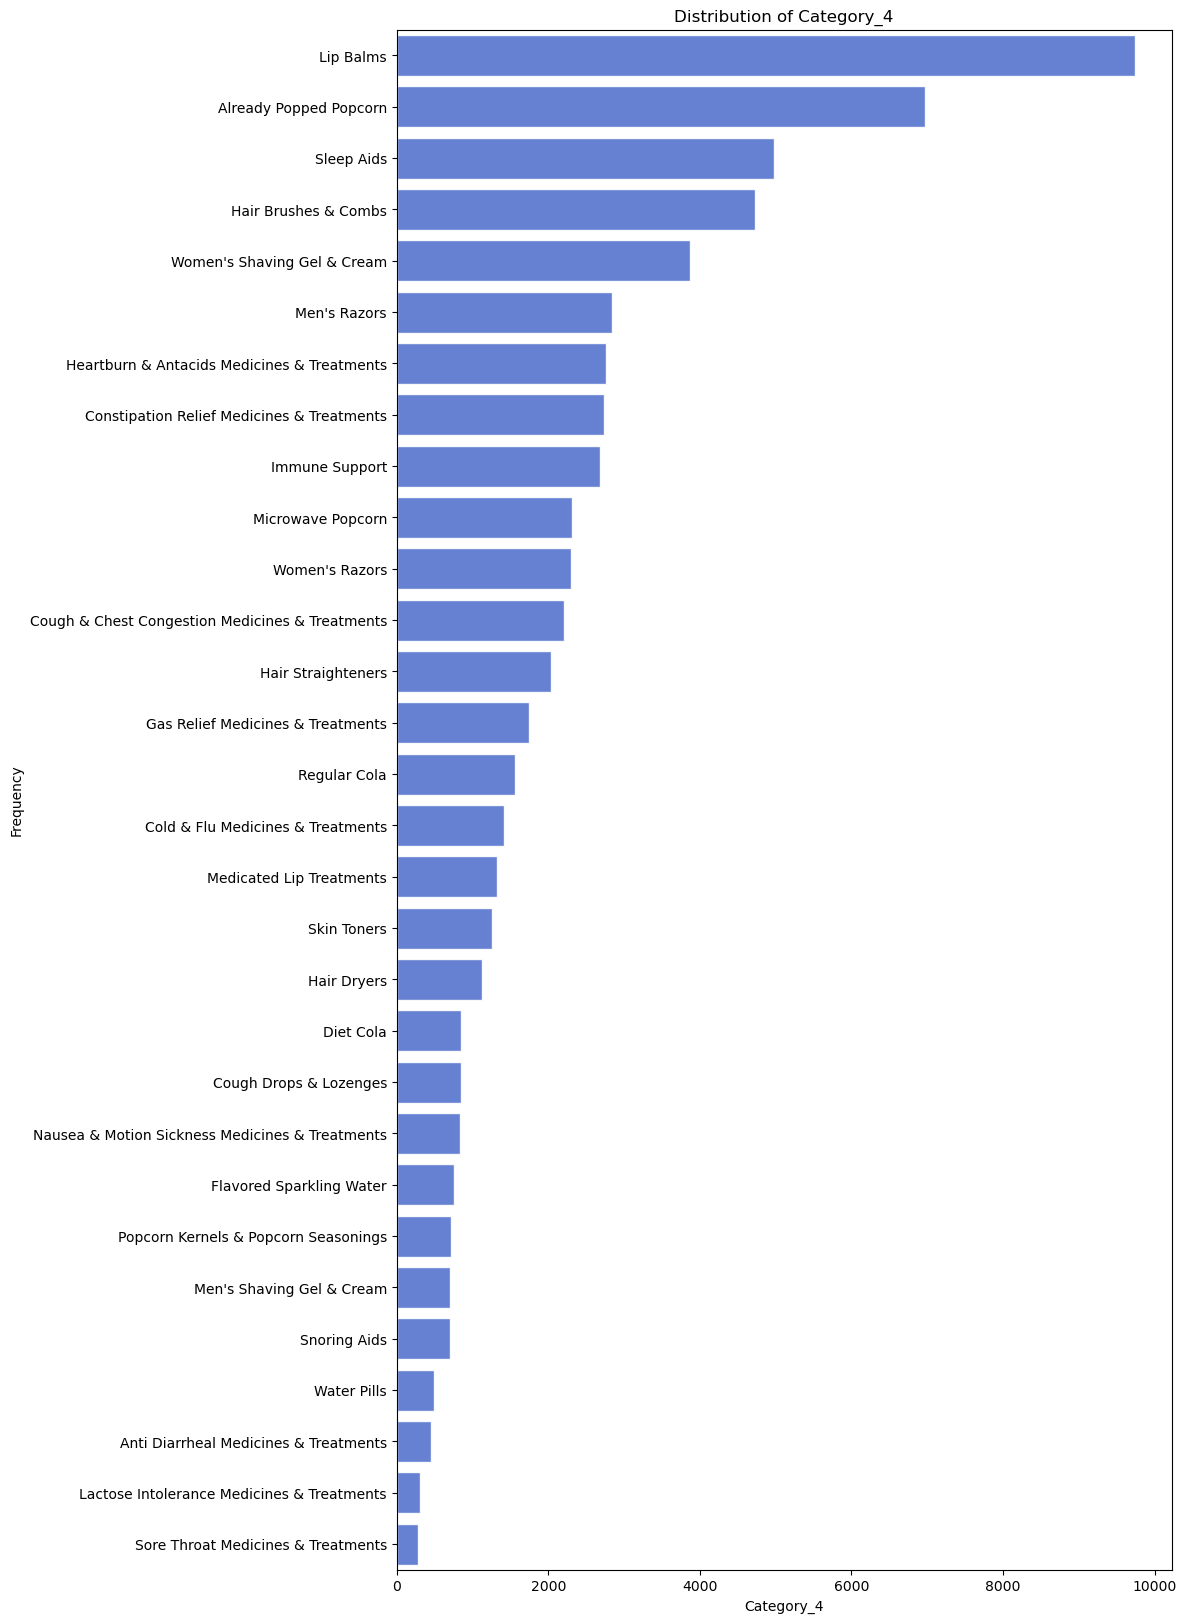

In [62]:
# 5. Distribution:

# Checking distribution for the top 30 categories

plt.figure(figsize=(10, 20))
cat4_counts = products['CATEGORY_4'].value_counts(dropna=True)
top_30_categories_4 = cat4_counts.head(30).index
sns.countplot(y=products['CATEGORY_4'], order=top_30_categories_4, color='royalblue', edgecolor='white', alpha=0.9)
plt.title("Distribution of Category_4")
plt.xlabel("Category_4")
plt.ylabel("Frequency")
plt.show()

**MANUFACTURER**

In [63]:
# 1. Missing Values:

products['MANUFACTURER'].isnull().sum()/len(products)

0.26784159933392626

**Observation**

26% of the data is missing. It is a significant problem for when we will have to use this column, and it raises serious concerns about data quality and potential biases

In [64]:
# 2. Unique Values:

products['MANUFACTURER'].nunique() # Number of unique values

4354

In [65]:
# 3. Value Counts and Frequencies:
 
products['MANUFACTURER'].value_counts(dropna=False) # Include NaN in counts

NaN                                  226474
PLACEHOLDER MANUFACTURER              86902
PROCTER & GAMBLE                      21065
REM MANUFACTURER                      20813
UNILEVER                              16864
                                      ...  
WHITEBRIDGE PET BRANDS                    1
G FABBRI SPA                              1
KOON CHUN HING KEE SOY SC                 1
SPRECHER BREWING COMPANY, LLC             1
OUTDOOR PRODUCT INNOVATIONS, INC.         1
Name: MANUFACTURER, Length: 4355, dtype: int64

**Observation**

A large number (12.74%) of values are set to the default values of "PLACEHOLDER MANUFACTURER" or "REM MANUFACTURER"

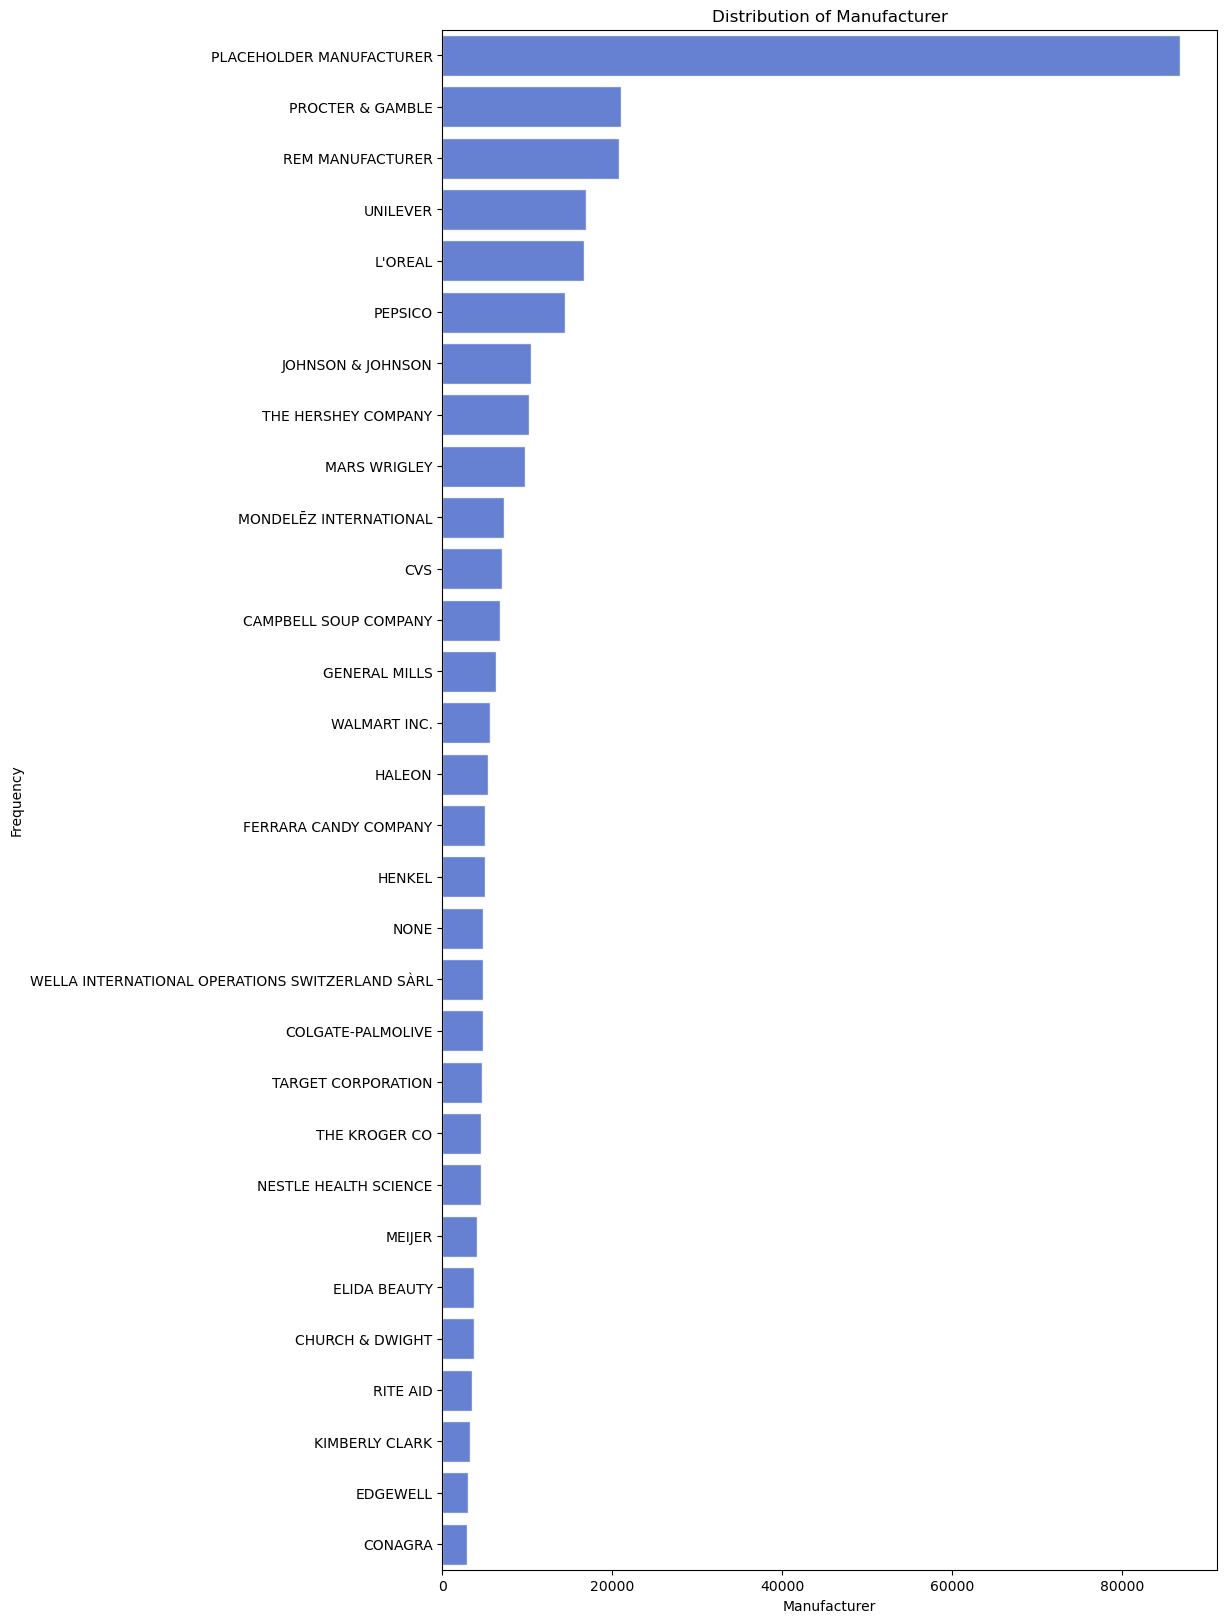

In [66]:
# 5. Distribution:

# Checking distribution for the top 30 categories

plt.figure(figsize=(10, 20))
manu_counts = products['MANUFACTURER'].value_counts(dropna=True)
top_30_manufacturers = manu_counts.head(30).index
sns.countplot(y=products['MANUFACTURER'], order=top_30_manufacturers, color='royalblue', edgecolor='white', alpha=0.9)
plt.title("Distribution of Manufacturer")
plt.xlabel("Manufacturer")
plt.ylabel("Frequency")
plt.show()

**BRAND**

In [67]:
# 1. Missing Values:

products['BRAND'].isnull().sum()/len(products)

0.2678392340151759

**Observation**

26% of the data is missing. It is a significant problem for when we will have to use this column, and it raises serious concerns about data quality and potential biases

In [68]:
# 2. Unique Values:

products['BRAND'].nunique() # Number of unique values

8122

In [69]:
# 3. Value Counts and Frequencies:
 
products['BRAND'].value_counts(dropna=False) # Include NaN in counts

NaN                          226472
REM BRAND                     20813
BRAND NOT KNOWN               17025
PRIVATE LABEL                 13467
CVS                            6400
                              ...  
LIDIAS                            1
EVIVA                             1
MANUKA HEALTH NEW ZEALAND         1
EL EBRO                           1
GATEWAY                           1
Name: BRAND, Length: 8123, dtype: int64

**Observation**

A large number (4.47%) of values are either "REM BRAND" or "BRAND NOT KNOWN"

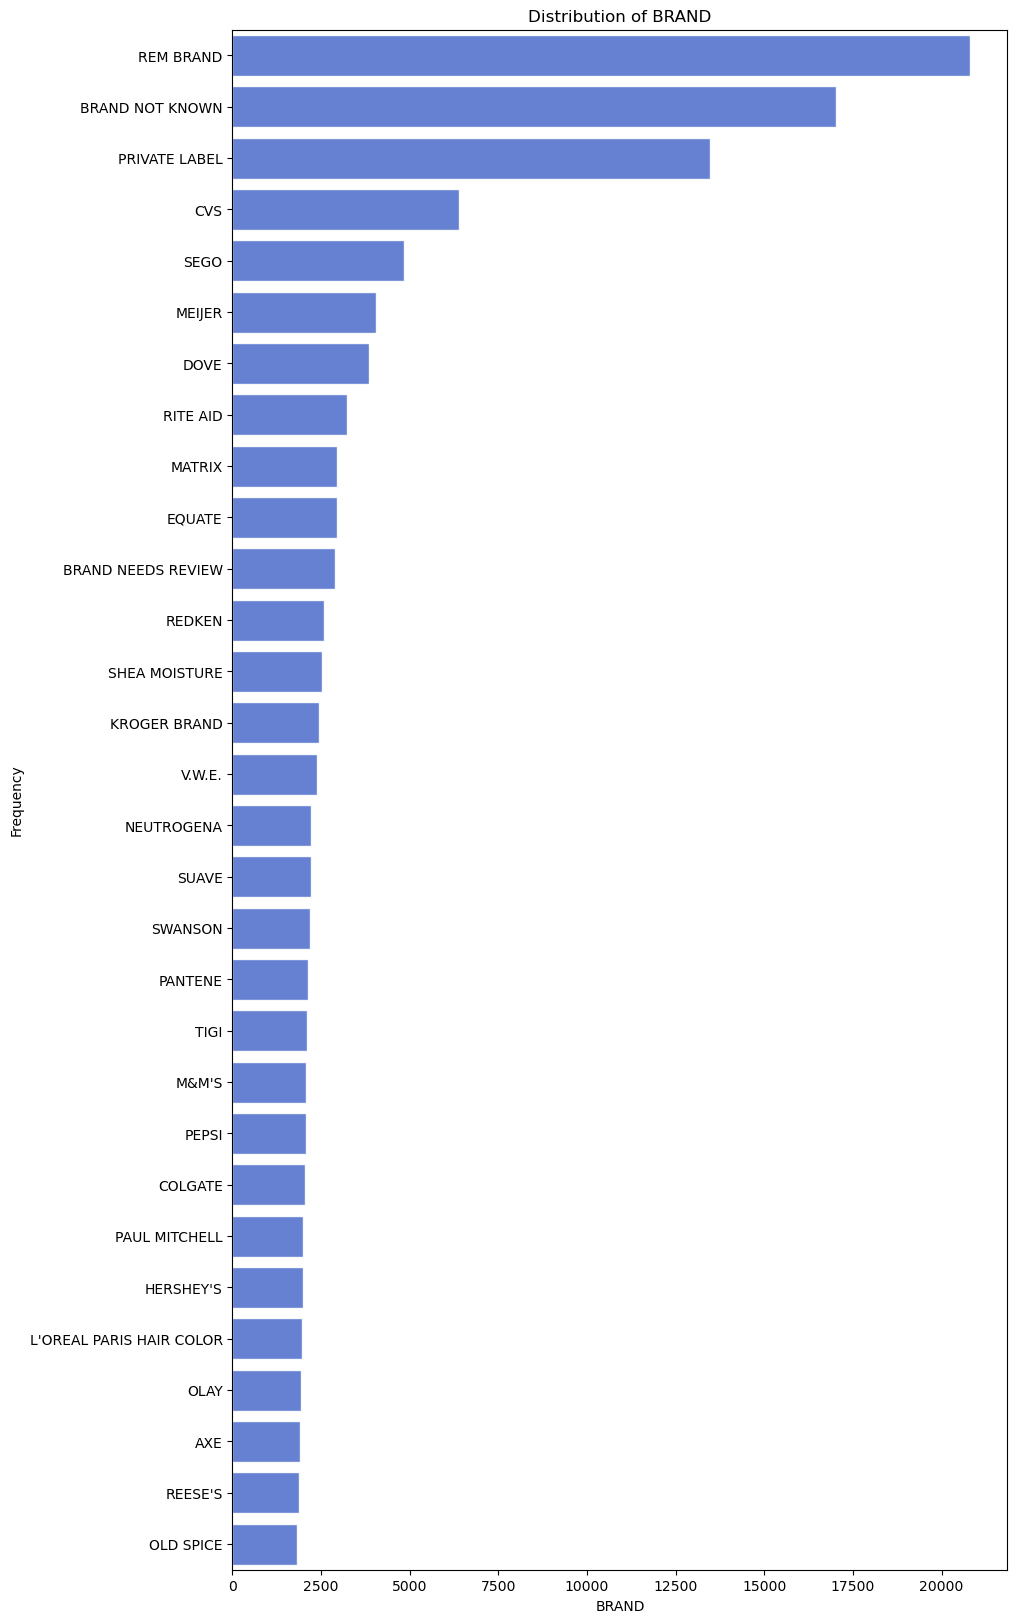

In [70]:
# 5. Distribution:

# Checking distribution for the top 30 categories

plt.figure(figsize=(10, 20))
brand_counts = products['BRAND'].value_counts(dropna=True)
top_30_brands = brand_counts.head(30).index
sns.countplot(y=products['BRAND'], order=top_30_brands, color='royalblue', edgecolor='white', alpha=0.9)
plt.title("Distribution of BRAND")
plt.xlabel("BRAND")
plt.ylabel("Frequency")
plt.show()

**BARCODE**

In [71]:
# 1. Missing Values:

products['BARCODE'].isnull().sum()/len(products)

0.0047602039850890305

**Observation**

Initial assumption was that BARCODE would be the primary key for this table to uniquely identify each product but it seems like there are missing values

In [72]:
# 2. Unique Values:

products['BARCODE'].nunique() # Number of unique values

841342

**Observation**

There are duplicates in the BARCODE column too

In [73]:
#Checking for duplicates in barcode

products['BARCODE'].duplicated().sum()

4209

In [74]:
#Identifying Duplicate Barcodes with the exact same categories

duplicate_barcodes = products[products.duplicated('BARCODE', keep=False)].sort_values('BARCODE')
print(f"Total Duplicate Barcodes Found: {duplicate_barcodes['BARCODE'].nunique()}")

Total Duplicate Barcodes Found: 185


In [75]:
#Keeping only one entry if duplicate entries are identical

products = products.drop_duplicates()

In [76]:
#Checking for duplicate barcodes after identical ones are dropped

duplicate_barcodes = products[products.duplicated('BARCODE', keep=False)].sort_values('BARCODE')
print(f"Total Duplicate Barcodes Found: {duplicate_barcodes['BARCODE'].nunique()}")

Total Duplicate Barcodes Found: 27


**Observation:**

Even after removing all duplicate rows, there are 27 duplicated BARCODEs(in different combinations of other column values).

In [77]:
# 3. Value Counts and Frequencies:
 
products['BARCODE'].value_counts(dropna=False)  # Include NaN in counts

NaN             3968
2.073306e+07       2
5.042617e+07       2
3.473009e+06       2
3.422007e+06       2
                ... 
7.192838e+11       1
4.342719e+10       1
7.007121e+11       1
1.816948e+10       1
7.967933e+11       1
Name: BARCODE, Length: 841343, dtype: int64

In [78]:
# Finding all the barcodes that are duplicated

barcode_counts = products['BARCODE'].value_counts(dropna=False)
barcodes_gt_1 = barcode_counts[barcode_counts > 1].index.tolist()

barcodes_gt_1

[nan,
 20733056.0,
 50426171.0,
 3473009.0,
 3422007.0,
 42208488.0,
 4003207.0,
 75053055.0,
 17000329260.0,
 20733254.0,
 3484708.0,
 87306286.0,
 969307.0,
 5265169.0,
 40111216.0,
 1018158.0,
 404310.0,
 701983.0,
 20031077.0,
 80199137.0,
 52336919068.0,
 80310167.0,
 87108538.0,
 3454503.0,
 360054002.0,
 20522445.0,
 20159078.0,
 3431207.0]

In [79]:
# 4. Empty Strings:

# Not needed

In [80]:
# 5. Distribution:

# Not needed

In [81]:
products.to_csv("Products_Cleaned.csv", index=False)

<h3>Transactions Table</h3>

In [82]:
#Importing the transactions table
transactions = pd.read_csv("TRANSACTION_TAKEHOME.csv")
transactions.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,


In [83]:
# Checking the information of the dataset
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      50000 non-null  object 
 1   PURCHASE_DATE   50000 non-null  object 
 2   SCAN_DATE       50000 non-null  object 
 3   STORE_NAME      50000 non-null  object 
 4   USER_ID         50000 non-null  object 
 5   BARCODE         44238 non-null  float64
 6   FINAL_QUANTITY  50000 non-null  object 
 7   FINAL_SALE      50000 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.1+ MB


Based on the Entity relationship model, we know the expected data types for the transactions table

The purchase_date and scan_date columns need to be converted into date time, the barcode column needs to be converted to string, and the final_quantity and final_sale columns need to be converted into integers.

In [84]:
# Converting the columns to their respective data types
transactions['PURCHASE_DATE'] = pd.to_datetime(transactions['PURCHASE_DATE'], errors ="coerce")
transactions['SCAN_DATE'] = pd.to_datetime(transactions['SCAN_DATE'], errors ="coerce")
transactions['FINAL_QUANTITY'] = pd.to_numeric(transactions['FINAL_QUANTITY'], errors ="coerce")
transactions['FINAL_SALE'] = pd.to_numeric(transactions['FINAL_SALE'], errors ="coerce")
transactions.info()
transactions.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   RECEIPT_ID      50000 non-null  object             
 1   PURCHASE_DATE   50000 non-null  datetime64[ns]     
 2   SCAN_DATE       50000 non-null  datetime64[ns, UTC]
 3   STORE_NAME      50000 non-null  object             
 4   USER_ID         50000 non-null  object             
 5   BARCODE         44238 non-null  float64            
 6   FINAL_QUANTITY  37500 non-null  float64            
 7   FINAL_SALE      37500 non-null  float64            
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(3), object(3)
memory usage: 3.1+ MB


(50000, 8)

**RECEIPT_ID**

In [85]:
# 1. Missing Values:

transactions['RECEIPT_ID'].isnull().sum()/len(transactions)

0.0

In [86]:
# 2. Unique Values:

transactions['RECEIPT_ID'].nunique() # Number of unique values

24440

In [87]:
#Checking for duplicates in RECEIPT_ID

transactions['RECEIPT_ID'].duplicated().sum()

25560

In [88]:
#Dropping duplicates from the transactions table that have the same value across the table

transactions = transactions.drop_duplicates()
transactions['RECEIPT_ID'].nunique()

24440

In [89]:
# 3. Value Counts and Frequencies:
 
transactions['RECEIPT_ID'].value_counts(dropna=False)  # Include NaN in counts

0fb89572-c817-47e2-bd11-6f467baacbb2    6
98d68d5d-71f1-4528-a83d-cdf6d308c79b    6
d6b3acb1-2c78-41f0-86be-9b65dae6c6b7    6
2acd7e8d-37df-4e51-8ee5-9a9c8c1d9711    6
f1808dd8-868b-4745-ad53-4178ef5fa1f8    6
                                       ..
56a368e6-d677-459d-ba05-70a886c3126b    2
56a0e14c-187c-43ec-96ab-b67ac5c197f1    2
569f4be9-63d1-4afd-8ed5-d520ce85b878    2
56946262-15b1-41fd-8814-fc544d35fc6c    2
fffe8012-7dcf-4d84-b6c6-feaacab5074a    2
Name: RECEIPT_ID, Length: 24440, dtype: int64

**Observation**

Need to inspect the individuals rows where we can find duplicates to know more

In [90]:
transactions[transactions['RECEIPT_ID'] == '0fb89572-c817-47e2-bd11-6f467baacbb2']

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
1518,0fb89572-c817-47e2-bd11-6f467baacbb2,2024-06-24,2024-06-25 17:51:10.487000+00:00,WALMART,6279df2c0310ba3330cdbd56,3.620000e+10,1.0,NaN
1519,0fb89572-c817-47e2-bd11-6f467baacbb2,2024-06-24,2024-06-25 17:51:10.487000+00:00,WALMART,6279df2c0310ba3330cdbd56,4.178900e+10,NaN,0.50
1520,0fb89572-c817-47e2-bd11-6f467baacbb2,2024-06-24,2024-06-25 17:51:10.487000+00:00,WALMART,6279df2c0310ba3330cdbd56,7.874201e+10,1.0,NaN
36819,0fb89572-c817-47e2-bd11-6f467baacbb2,2024-06-24,2024-06-25 17:51:10.487000+00:00,WALMART,6279df2c0310ba3330cdbd56,7.874201e+10,1.0,1.42
40776,0fb89572-c817-47e2-bd11-6f467baacbb2,2024-06-24,2024-06-25 17:51:10.487000+00:00,WALMART,6279df2c0310ba3330cdbd56,3.620000e+10,1.0,4.78
45747,0fb89572-c817-47e2-bd11-6f467baacbb2,2024-06-24,2024-06-25 17:51:10.487000+00:00,WALMART,6279df2c0310ba3330cdbd56,4.178900e+10,1.0,0.50


In [91]:
transactions[transactions['RECEIPT_ID'] == '98d68d5d-71f1-4528-a83d-cdf6d308c79b']

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
14978,98d68d5d-71f1-4528-a83d-cdf6d308c79b,2024-08-12,2024-08-12 12:40:23.184000+00:00,WALMART,64486dd4347839fdfa9a28bb,2.840009e+10,1.0,NaN
14979,98d68d5d-71f1-4528-a83d-cdf6d308c79b,2024-08-12,2024-08-12 12:40:23.184000+00:00,WALMART,64486dd4347839fdfa9a28bb,2.840009e+10,NaN,0.49
14980,98d68d5d-71f1-4528-a83d-cdf6d308c79b,2024-08-12,2024-08-12 12:40:23.184000+00:00,WALMART,64486dd4347839fdfa9a28bb,6.527297e+11,1.0,NaN
30380,98d68d5d-71f1-4528-a83d-cdf6d308c79b,2024-08-12,2024-08-12 12:40:23.184000+00:00,WALMART,64486dd4347839fdfa9a28bb,2.840009e+10,1.0,0.49
31616,98d68d5d-71f1-4528-a83d-cdf6d308c79b,2024-08-12,2024-08-12 12:40:23.184000+00:00,WALMART,64486dd4347839fdfa9a28bb,6.527297e+11,1.0,1.48
44637,98d68d5d-71f1-4528-a83d-cdf6d308c79b,2024-08-12,2024-08-12 12:40:23.184000+00:00,WALMART,64486dd4347839fdfa9a28bb,2.840009e+10,1.0,0.49


In [92]:
transactions[transactions['RECEIPT_ID'] == '56a368e6-d677-459d-ba05-70a886c3126b']

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
8398,56a368e6-d677-459d-ba05-70a886c3126b,2024-07-24,2024-07-24 17:43:01.957000+00:00,WALMART,5bb01461d0a4061a7c6371c7,2.354520e+10,1.0,NaN
40945,56a368e6-d677-459d-ba05-70a886c3126b,2024-07-24,2024-07-24 17:43:01.957000+00:00,WALMART,5bb01461d0a4061a7c6371c7,2.354520e+10,1.0,3.97


In [93]:
transactions[transactions['RECEIPT_ID'] == '56946262-15b1-41fd-8814-fc544d35fc6c']

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
8395,56946262-15b1-41fd-8814-fc544d35fc6c,2024-06-14,2024-06-17 01:12:11.893000+00:00,SMITH'S,66073fc16c9160420267f93a,NaN,NaN,2.99
35454,56946262-15b1-41fd-8814-fc544d35fc6c,2024-06-14,2024-06-17 01:12:11.893000+00:00,SMITH'S,66073fc16c9160420267f93a,NaN,1.0,2.99


**Observations:**

There are 3 different types of duplicates:
1. Some duplicates differ only in the FINAL_QUANTITY column, which is null. Since a FINAL_SALE value implies a corresponding quantity, these rows are considered invalid and should be removed.
2. Similar to the above, other duplicates differ solely in the FINAL_SALE column, which is null. As a quantity necessitates a sale value, these rows should also be removed.
3. Multiple Items/Barcodes: Finally, some duplicates vary in FINAL_SALE, FINAL_QUANTITY, and BARCODE, indicating multiple items or barcodes on a single receipt. The same consistency rules regarding null values in FINAL_QUANTITY and FINAL_SALE should be applied to these entries to remove any invalid duplicates.

In [94]:
# Remove rows where FINAL_QUANTITY is not null and FINAL_SALE is null

transactions = transactions[~((transactions['FINAL_QUANTITY'].notna()) & (transactions['FINAL_SALE'].isna()))]

In [95]:
# Remove rows where FINAL_QUANTITY is not null and FINAL_SALE is null

transactions = transactions[~((transactions['FINAL_SALE'].notna()) & (transactions['FINAL_QUANTITY'].isna()))]

In [96]:
transactions['RECEIPT_ID'].value_counts(dropna=False)  

dd03ea1b-0fae-4bcf-bb55-d7e36eaa75b5    3
79151f8d-0b75-48e2-8bb4-2591bc8c9ca2    3
d6a313ee-1aa3-4acb-a90d-f0d962ae7b8c    3
2acd7e8d-37df-4e51-8ee5-9a9c8c1d9711    3
98d68d5d-71f1-4528-a83d-cdf6d308c79b    3
                                       ..
f2e87c6f-c9ef-4615-9ad2-a1b832f8f69e    1
ddab8fa2-159a-403d-b96c-f51f13ee4325    1
5640be8e-e8aa-4b5b-bb75-b8a07dd230ef    1
bf8fc15f-c368-47db-b933-f601451cbfa6    1
3a179c4e-46f2-4126-b3d2-3514afc23a3e    1
Name: RECEIPT_ID, Length: 24440, dtype: int64

In [97]:
transactions[transactions['RECEIPT_ID'] == 'dd03ea1b-0fae-4bcf-bb55-d7e36eaa75b5']

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
31373,dd03ea1b-0fae-4bcf-bb55-d7e36eaa75b5,2024-08-16,2024-08-23 08:50:24.805000+00:00,WALMART,62099fee0ede521c349b0cb3,2.430004e+10,1.0,2.68
33602,dd03ea1b-0fae-4bcf-bb55-d7e36eaa75b5,2024-08-16,2024-08-23 08:50:24.805000+00:00,WALMART,62099fee0ede521c349b0cb3,3.600054e+10,1.0,14.88
47805,dd03ea1b-0fae-4bcf-bb55-d7e36eaa75b5,2024-08-16,2024-08-23 08:50:24.805000+00:00,WALMART,62099fee0ede521c349b0cb3,7.874223e+10,1.0,0.78


In [98]:
# 4. Empty Strings:

# Not needed

In [99]:
# 5. Distribution:

# Not needed 

**PURCHASE_DATE**

In [100]:
# 1. Missing Values:

transactions['PURCHASE_DATE'].isnull().sum()/len(transactions)

0.0

In [101]:
# 2. Unique Values:

transactions['PURCHASE_DATE'].nunique() # Number of unique values

89

**Observation**

We have transactions only for 89 days

In [102]:
# 3. Value Counts and Frequencies:
 
transactions['PURCHASE_DATE'].value_counts(dropna=False)  # Include NaN in counts

2024-07-03    386
2024-06-15    384
2024-07-01    376
2024-08-03    360
2024-07-13    354
             ... 
2024-08-21    211
2024-09-04    193
2024-09-06    190
2024-09-07    190
2024-09-08    118
Name: PURCHASE_DATE, Length: 89, dtype: int64

In [103]:
# 4. Empty Strings:

# Not needed

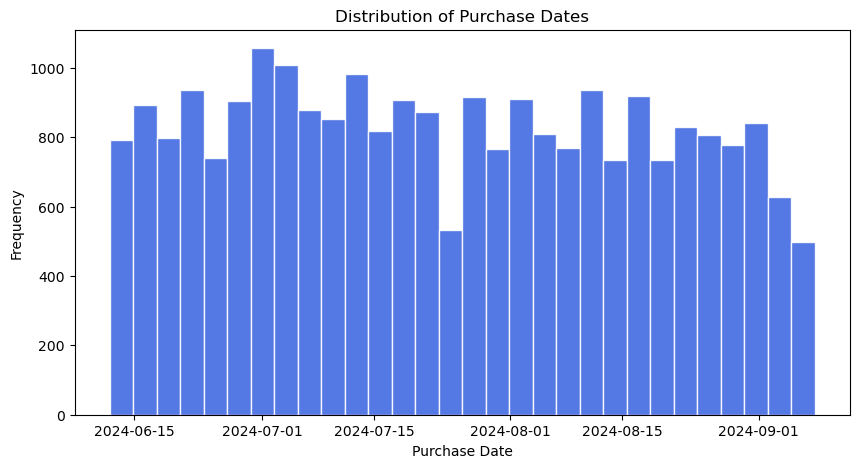

In [104]:
# 5. Distribution:

plt.figure(figsize=(10, 5))
plt.hist(transactions['PURCHASE_DATE'], bins=30, color='royalblue', edgecolor='white', alpha=0.9)
plt.title("Distribution of Purchase Dates")
plt.xlabel("Purchase Date")
plt.ylabel("Frequency")
plt.show()

**Observation**

We have transactions only for 2024

**SCAN_DATE**

In [105]:
# 1. Missing Values:

transactions['SCAN_DATE'].isnull().sum()/len(transactions)

0.0

In [106]:
# 2. Unique Values:

transactions['SCAN_DATE'].nunique() # Number of unique values

24440

In [107]:
# 3. Value Counts and Frequencies:
 
transactions['SCAN_DATE'].value_counts(dropna=False)  # Include NaN in counts

2024-08-23 08:50:24.805000+00:00    3
2024-08-29 13:45:42.547000+00:00    3
2024-07-27 21:11:05.560000+00:00    3
2024-09-08 11:13:01.935000+00:00    3
2024-08-12 12:40:23.184000+00:00    3
                                   ..
2024-07-17 08:16:00.771000+00:00    1
2024-07-20 13:38:22.003000+00:00    1
2024-07-22 22:34:55.726000+00:00    1
2024-07-31 16:39:45.469000+00:00    1
2024-08-07 15:30:07.911000+00:00    1
Name: SCAN_DATE, Length: 24440, dtype: int64

In [108]:
# 4. Empty Strings:

# Not needed

In [109]:
# 5. Distribution:

# Not needed

**STORE_NAME**

In [110]:
# 1. Missing Values:

transactions['STORE_NAME'].isnull().sum()/len(transactions)

0.0

In [111]:
# 2. Unique Values:

transactions['STORE_NAME'].nunique() # Number of unique values

954

In [112]:
# 3. Value Counts and Frequencies:
 
transactions['STORE_NAME'].value_counts(dropna=False)  # Include NaN in counts

WALMART                      10595
DOLLAR GENERAL STORE          1371
ALDI                          1313
TARGET                         742
KROGER                         732
                             ...  
SENTARA LEIGH DUTNATIENT         1
DOLLAR KING                      1
CUMBERLAND FARMS                 1
BAILEYS PRODUCE & NURSERY        1
PEPPERIDGE FARM                  1
Name: STORE_NAME, Length: 954, dtype: int64

In [113]:
# 4. Empty Strings:

(transactions['STORE_NAME'] == "").sum()

0

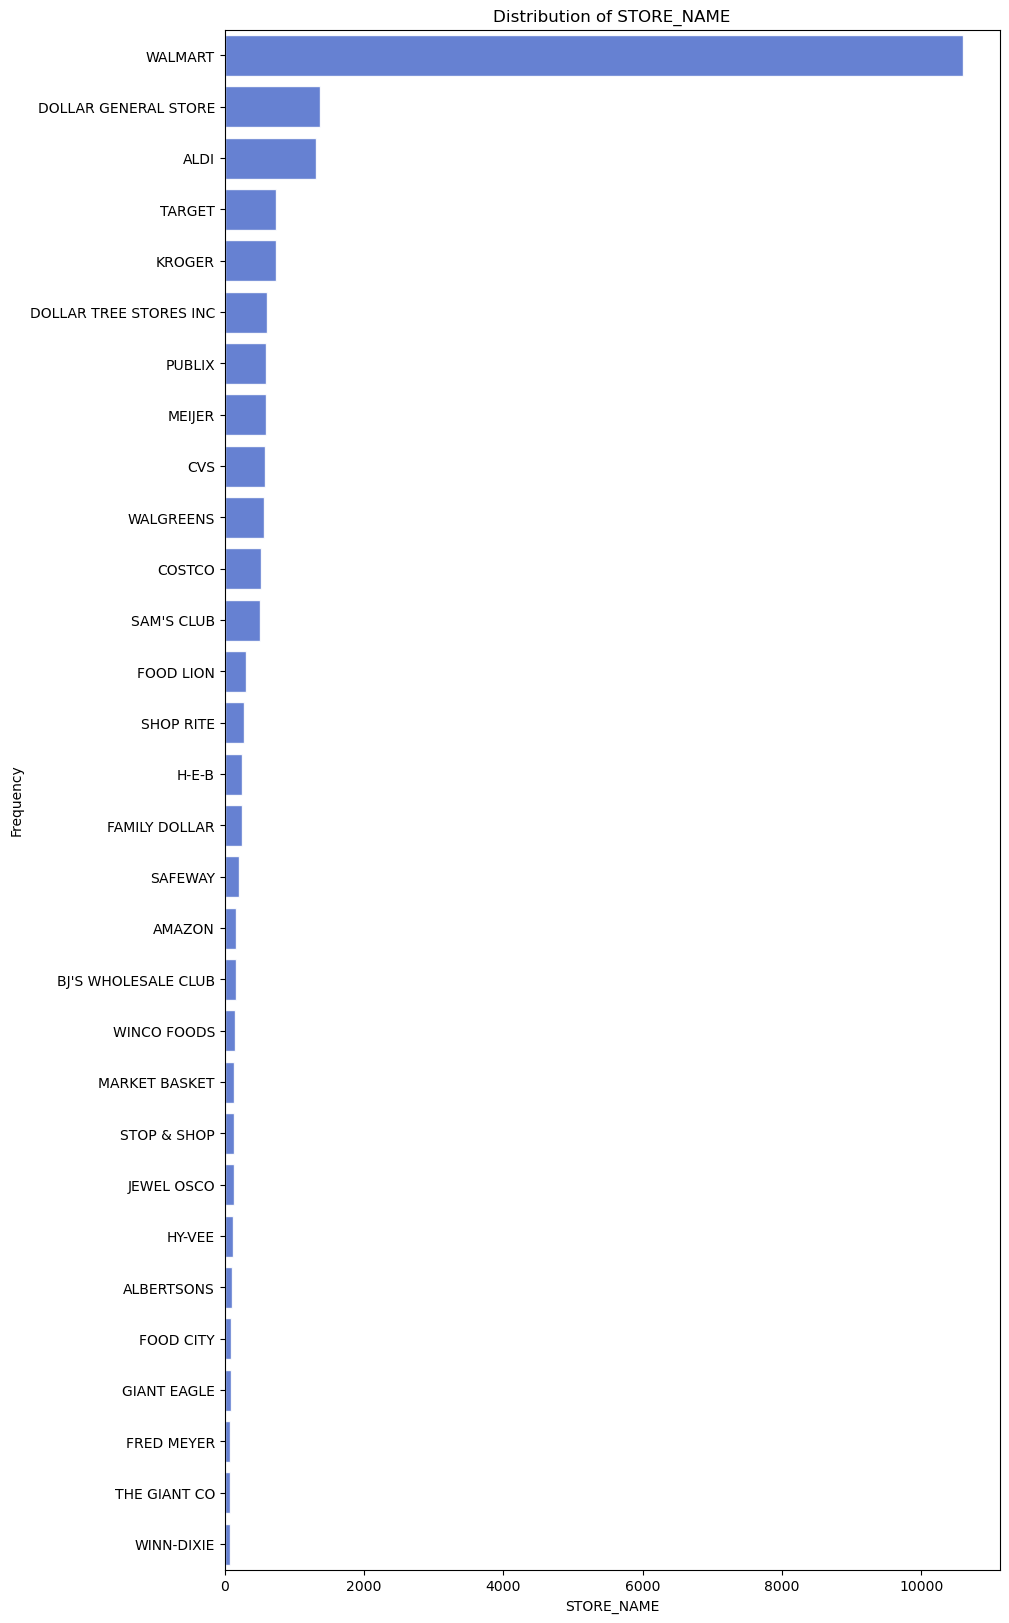

In [114]:
# 5. Distribution:

# Checking distribution for the top 30 stores

plt.figure(figsize=(10, 20))
store_counts = transactions['STORE_NAME'].value_counts(dropna=True)
top_30_stores = store_counts.head(30).index
sns.countplot(y=transactions['STORE_NAME'], order=top_30_stores, color='royalblue', edgecolor='white', alpha=0.9)
plt.title("Distribution of STORE_NAME")
plt.xlabel("STORE_NAME")
plt.ylabel("Frequency")
plt.show()

**USER_ID**

In [115]:
# 1. Missing Values:

transactions['USER_ID'].isnull().sum()/len(transactions)

0.0

In [116]:
# 2. Unique Values:

transactions['USER_ID'].nunique() # Number of unique values

17694

In [117]:
# 3. Value Counts and Frequencies:
 
transactions['USER_ID'].value_counts(dropna=False)  # Include NaN in counts

64e62de5ca929250373e6cf5    11
62925c1be942f00613f7365e    10
604278958fe03212b47e657b    10
64063c8880552327897186a5     9
609af341659cf474018831fb     7
                            ..
5cdf3e4f259eea392340259c     1
626431090935a90c9dbe4a21     1
5c9a7c7c81295f131edadea8     1
649c9a85127ddb5d7f015c5c     1
64e94d64ca929250373ef6e1     1
Name: USER_ID, Length: 17694, dtype: int64

**Observations:**

As USER_ID is a foreign key to the 'users' table, I would now want to see how many of the users in this table match with the ones in the users table

In [118]:
# Find the number of users present in both tables
common_users = transactions.merge(users, left_on='USER_ID', right_on='ID', how='inner')

# Count unique users in both tables
num_common_users = common_users['USER_ID'].nunique()

print(f"Number of users present in both tables: {num_common_users}")

Number of users present in both tables: 91


**Observations:**

There are only 91 users common between both the tables.

In [119]:
# 4. Empty Strings:

(transactions['USER_ID'] == "").sum()

0

In [120]:
# 5. Distribution:

# Not Needed

**BARCODE**

In [121]:
# 1. Missing Values:

transactions['BARCODE'].isnull().sum()/len(transactions)

0.11492032834379527

**Observations:**

11.49% of the BARCODE values are missing. 

In [122]:
# 2. Unique Values:

transactions['BARCODE'].nunique() # Number of unique values

11027

In [123]:
# 3. Value Counts and Frequencies:
 
transactions['BARCODE'].value_counts(dropna=False)  # Include NaN in counts

NaN             2856
7.874222e+10      90
5.111115e+11      84
5.111110e+11      81
7.874229e+10      79
                ... 
3.250010e+10       1
8.523918e+10       1
6.432333e+10       1
7.055990e+11       1
3.076607e+11       1
Name: BARCODE, Length: 11028, dtype: int64

**Observations:**

As BARCODE is a foreign key to the 'products' table, I would now want to see how many of the products in this table match with the ones in the products table

In [124]:
# Find the number of products present in both tables
common_products = transactions.merge(products, on='BARCODE', how='inner')

# Count unique users in both tables
num_common_products = common_products['BARCODE'].nunique()

print(f"Number of users present in both tables: {num_common_products}")

Number of users present in both tables: 6562


**Observations:**

Only 59% of the products in the transactions have the same BARCODE as that in the products table

In [125]:
# 4. Empty Strings:

(transactions['BARCODE'] == "").sum()

0

In [126]:
# 5. Distribution:

# Not needed

**FINAL_QUANTITY**

In [127]:
# 1. Missing Values:

transactions['FINAL_QUANTITY'].isnull().sum()/len(transactions)

0.0

In [128]:
# 2. Zero Values:

(transactions['FINAL_QUANTITY'] == 0).sum()

0

In [129]:
# 3. Negative Values:

(transactions['FINAL_QUANTITY'] < 0).sum()

0

In [130]:
# 4. Unique Values:

transactions['FINAL_QUANTITY'].nunique() # Number of unique values

86

In [131]:
# 5. Descriptive Stats

transactions['FINAL_QUANTITY'].describe()

count    24852.000000
mean         1.084078
std          1.800576
min          0.010000
25%          1.000000
50%          1.000000
75%          1.000000
max        276.000000
Name: FINAL_QUANTITY, dtype: float64

**FINAL_SALE**

In [132]:
# 1. Missing Values:

transactions['FINAL_SALE'].isnull().sum()/len(transactions)

0.0

In [133]:
# 2. Zero Values:

(transactions['FINAL_SALE'] == 0).sum()

314

In [134]:
# 3. Negative Values:

(transactions['FINAL_SALE'] < 0).sum()

0

In [135]:
# 4. Unique Values:

transactions['FINAL_SALE'].nunique() # Number of unique values

1434

In [136]:
# 5. DEscriptive Stats

transactions['FINAL_SALE'].describe()

count    24852.000000
mean         4.580774
std          6.544073
min          0.000000
25%          1.800000
50%          3.000000
75%          5.190000
max        462.820000
Name: FINAL_SALE, dtype: float64

In [137]:
transactions.to_csv("Transactions_Cleaned.csv", index=False)

<H3> Questions </H3>

**Are there any data quality issues present?**

Below are some of the data quality issues I could find:

### Users Table

#### Missing Data:
A significant portion of the user data is missing:
- **BIRTH_DATE:** 3% missing, 2.3% defaulted to `"1970-01-01 00:00:00+00:00"`
- **STATE:** 4.8% missing
- **LANGUAGE:** 30% missing
- **GENDER:** 5.8% missing

#### Data Inconsistencies:
- **BIRTH_DATE:** Contains outliers beyond reasonable age limits (100+ and even 120+ years).
- **GENDER:** Redundant categories exist (e.g., `"not_listed"`, `"My gender isn't listed"`, `"Prefer not to say"`, `"prefer_not_to_say"`).


### Products Table

#### Missing Data:
Substantial missing data in several columns:
- **CATEGORY_3:** 7% missing
- **CATEGORY_4:** 92% missing
- **MANUFACTURER:** 26% missing
- **BRAND:** 26% missing

#### Default/Placeholder Values:
- **MANUFACTURER:** 12.74% are `"PLACEHOLDER MANUFACTURER"` or `"REM MANUFACTURER"`
- **BRAND:** 4.47% are `"REM BRAND"` or `"BRAND NOT KNOWN"`

#### Data Integrity:
- **BARCODE:** Missing and duplicate values.


### Transactions Table

#### Duplicate Records:
- **RECEIPT_ID:** Has three types of duplicates:
    1. Some duplicates differ only in the FINAL_QUANTITY column, which is null. Since a FINAL_SALE value implies a corresponding quantity, these rows are considered invalid and should be removed.
    2. Similar to the above, other duplicates differ solely in the FINAL_SALE column, which is null. As a quantity necessitates a sale value, these rows should also be removed.
    3. Multiple Items/Barcodes: Finally, some duplicates vary in FINAL_SALE, FINAL_QUANTITY, and BARCODE, indicating multiple items or barcodes on a single receipt. The same consistency rules regarding null values in FINAL_QUANTITY and FINAL_SALE should be applied to these entries to remove any invalid duplicates.

#### Limited Date Range:
- **PURCHASE_DATE:** Spans only 89 days in 2024.

#### User Coverage:
- Only 91 users from the **Transactions** table are present in the **Users** table.

#### Data Integrity:
- **BARCODE:** 11.5% missing.
- **Product Matching:** Only 59% of product **BARCODE**s in **Transactions** match those in **Products**.

### Please Note: 
**For this exercise, I have primarily focused on identifying and highlighting data quality issues within the datasets with minimal cleanup. As a next step, we can explore addressing these issues at the source to improve data integrity. Additionally, various imputation techniques can be applied depending on the specific analysis and use case.**


**Are there any fields that are challenging to understand?**

Some challenging aspects of these datasets are:

- **BIRTH_DATE (Users Table):** The presence of a large number of default values (1970-01-01) and extreme outliers (100+ or 120+ years) raises questions about data accuracy and intended use. It is unclear if these default values indicate missing data or have a specific business logic.
- **GENDER (Users Table):** Redundant categories such as "not_listed", "My gender isn't listed", "Prefer not to say", and "prefer_not_to_say" suggest inconsistency in data entry. Clarification is needed on whether these should be standardized or mapped to a single category.
- **CATEGORY_3 and CATEGORY_4 (Products Table):** High missing rates (7% and 92%, respectively) raise concerns about their importance and usage. It's unclear how these categories are defined and whether they impact product classification.
- **MANUFACTURER and BRAND (Products Table):** The existence of placeholder values like "PLACEHOLDER MANUFACTURER", "REM MANUFACTURER", "REM BRAND", and "BRAND NOT KNOWN" suggests uncertainty. It is unclear whether these placeholders serve as temporary data or if they indicate missing information.
- **RECEIPT_ID (Transactions Table):** Multiple types of duplicates exist, especially where some entries differ only by FINAL_QUANTITY or FINAL_SALE. This raises ambiguity around whether these represent data entry errors or expected variations in transactional records.
- **BARCODE (Products and Transactions Table):** Missing values and inconsistencies between BARCODE in transactions and products (only 59% match) suggest potential issues in product mapping. Clarification is needed on whether different barcodes are expected for the same product or if this points to a data quality issue.
- **USER_ID (Users and Transactions Table):** Only 91 users in the Transactions table exist in the Users table. This suggests that the Users table is incomplete.

---

<H2> SQL Queries </H2>

Please note that the analysis assumes the currently available data (despite its quality issues) is representative of the complete, error-free dataset. The intent is to illustrate the thought process behind answering these questions using SQL queries.

**What are the top 5 brands by receipts scanned among users 21 and over?**

**Query:**
```sql
SELECT
  p.BRAND,
  COUNT(t.RECEIPT_ID) AS Transactions_Count
FROM
  `fetch_assignment.transactions` t  -- Transactions table
  JOIN `fetch_assignment.users` u ON t.USER_ID = u.ID  -- Join with users table to get user details
  JOIN `fetch_assignment.products` p ON t.BARCODE = p.BARCODE  -- Join with products table to get brand details
WHERE
  DATE_DIFF(DATE(CURRENT_DATETIME()), DATE(u.BIRTH_DATE), YEAR) >= 21  -- Filter users who are 21 years or older
  AND p.BRAND IS NOT NULL  -- Exclude records where the brand is null
GROUP BY 1  -- Group results by brand
ORDER BY 2 DESC  -- Order by transaction count in descending order
LIMIT 5  -- Limit the results to the top 5 brands
```
**Result:**
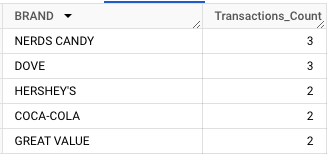

**What are the top 5 brands by sales among users that have had their account for at least six months?**

**Query:**
```sql
SELECT
  p.BRAND,
  SUM(t.FINAL_SALE) AS Sales_Volume  -- Sum of final sale amounts for each brand
FROM
  `fetch_assignment.transactions` t  -- Transactions table
  JOIN `fetch_assignment.users` u ON t.USER_ID = u.ID  -- Join with users table to get user details
  JOIN `fetch_assignment.products` p ON t.BARCODE = p.BARCODE  -- Join with products table to get brand details
WHERE
  DATE_DIFF(DATE(CURRENT_DATETIME()), DATE(u.CREATED_DATE), MONTH) >= 6  -- Filter users who joined at least 6 months ago
  AND p.BRAND IS NOT NULL  -- Exclude records where the brand is null
GROUP BY 1  -- Group results by brand
ORDER BY 2 DESC  -- Order by sales volume in descending order
LIMIT 5  -- Limit the results to the top 5 brands by sales volume
```

**Result:**
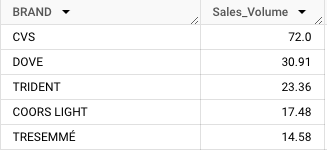

**What is the percentage of sales in the Health & Wellness category by generation?**

I am assuming that 'generation' is defined based on birth year. It uses the following ranges to assign users to different generations:
- Baby Boomers: Birth years between 1946 and 1964 (inclusive).
- Gen X: Birth years between 1965 and 1980 (inclusive).
- Millennials: Birth years between 1981 and 1996 (inclusive).
- Gen Z: Birth years between 1997 and 2012 (inclusive).
- Gen Alpha: Birth years outside the other specified ranges, effectively including those born after 2012.

**Query:**
```sql
SELECT
  CASE 
    WHEN CAST(EXTRACT(YEAR FROM u.BIRTH_DATE) AS INT) BETWEEN 1946 AND 1964 THEN 'Baby Boomers'  -- Users born between 1946 and 1964
    WHEN CAST(EXTRACT(YEAR FROM u.BIRTH_DATE) AS INT) BETWEEN 1965 AND 1980 THEN 'Gen X'  -- Users born between 1965 and 1980
    WHEN CAST(EXTRACT(YEAR FROM u.BIRTH_DATE) AS INT) BETWEEN 1981 AND 1996 THEN 'Millenials'  -- Users born between 1981 and 1996
    WHEN CAST(EXTRACT(YEAR FROM u.BIRTH_DATE) AS INT) BETWEEN 1997 AND 2012 THEN 'Gen Z'  -- Users born between 1997 and 2012
    ELSE 'Gen Alpha'  -- Users born after 2012
  END AS Generation,  -- Assign generation label based on birth year
  ROUND(
    SUM(CASE WHEN p.CATEGORY_1 = 'Health & Wellness' THEN t.FINAL_SALE ELSE 0 END) * 100 / SUM(t.FINAL_SALE), 2
  ) AS Sales_Percentage  -- Calculate the percentage of sales for 'Health & Wellness' products
FROM
  `fetch_assignment.transactions` t  -- Transactions table
  JOIN `fetch_assignment.products` p ON t.BARCODE = p.BARCODE  -- Join with products table to get product details
  JOIN `fetch_assignment.users` u ON t.USER_ID = u.ID  -- Join with users table to get user details
GROUP BY 1  -- Group results by generation
ORDER BY 2 DESC  -- Order by sales percentage in descending order
```

**Result:**
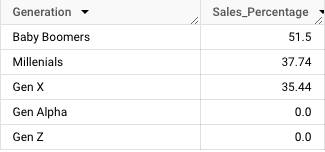

**Who are Fetch’s power users?**

My definition of 'power users' are top 5% of the users based on number of receipts scanned, indicating high engagement. This metric directly reflects core app usage, making it a clear and actionable measure of valuable users. This focus on receipt volume ensures identification of the most active participants. This definition can be chaged based on usecase. 

**Query:**
```sql
-- Create a Common Table Expression (CTE) to calculate the number of transactions per user
WITH Transaction_Counts AS (
  SELECT
    USER_ID,
    COUNT(RECEIPT_ID) AS Transactions_Count  -- Count the number of transactions for each user
  FROM
    `fetch_assignment.transactions`  -- Transactions table
  GROUP BY 1  -- Group by USER_ID
  ORDER BY 2 DESC  -- Order by transaction count in descending order
),

-- Create another CTE to rank users based on their transaction counts
ranked_Transactions_Counts AS (
  SELECT 
    *,
    DENSE_RANK() OVER(ORDER BY Transactions_Count DESC) AS rnk  -- Assign a dense rank to each user based on transaction count
  FROM
    Transaction_Counts
)

-- Select the top 5% of users with the highest transaction counts
SELECT
  USER_ID,
  Transactions_Count
FROM
  ranked_Transactions_Counts
WHERE 
  rnk <= (SELECT (CAST(COUNT(DISTINCT USER_ID) AS INT) * 0.05) FROM `fetch_assignment.transactions`)  -- Filter users in the top 5% based on rank
ORDER BY 2 DESC  -- Order by transaction count in descending order
```

**Result (Only top 12):**
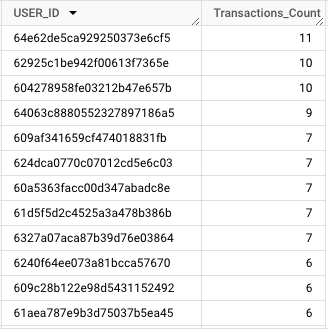

**Which is the leading brand in the Dips & Salsa category?**

Leading brand based on the revenue it generates (total sales).

**Query:**
```sql
-- Create a Common Table Expression (CTE) to calculate total sales for each brand in the 'Dips & Salsa' category
WITH brand_sales AS (
  SELECT 
    p.BRAND,
    SUM(FINAL_SALE) AS Sales  -- Calculate total sales for each brand
  FROM
    `fetch_assignment.transactions` t  -- Transactions table
    JOIN `fetch_assignment.products` p ON t.BARCODE = p.BARCODE  -- Join with products table to get brand details
  WHERE
    p.CATEGORY_2 = 'Dips & Salsa'  -- Filter products in the 'Dips & Salsa' category
    AND p.CATEGORY_2 IS NOT NULL  -- Exclude records where the category is null
  GROUP BY 1  -- Group results by brand
  ORDER BY 2 DESC  -- Order by total sales in descending order
)

-- Select the top-selling brand in the 'Dips & Salsa' category
SELECT
  BRAND
FROM
  brand_sales
LIMIT 1  -- Limit the result to the top 1 brand
```

**Result**
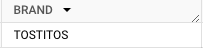

**At what percent has Fetch grown year over year?**

Since the dataset only covers the 2024 calendar year, I opted to analyze month-over-month (MoM) sales growth rather than year-over-year (YoY) growth. However, it’s important to note that MoM analysis can be heavily influenced by seasonal factors, which might mask broader, long-term trends. As a result, the MoM growth rates shown here should be interpreted as short-term shifts rather than indicators of consistent, ongoing growth. 

Additionally, there arent equal number of days for each month. There are 19, 31, 31 and 8 days of transactions for June, July, August and Sept respctively. Hence, comparing these sums might not be the best approach.  

This approach mainly demonstrates how to calculate period-over-period growth when working with limited data.

**Query:**
```sql
-- Create a Common Table Expression (CTE) to calculate monthly sales
WITH monthly_sales AS (
  SELECT
    EXTRACT(MONTH FROM PURCHASE_DATE) AS Month,  -- Extract the month from the purchase date
    ROUND(SUM(final_sale), 2) AS Sales  -- Calculate total sales for each month
  FROM 
    `fetch_assignment.transactions`  -- Transactions table
  GROUP BY 1  -- Group results by month
)

-- Calculate month-over-month sales growth percentage
SELECT
  *,
  ROUND((Sales - (LAG(Sales) OVER(ORDER BY Month)))*100/(LAG(Sales) OVER(ORDER BY Month)),2) AS Growth_Percentage  -- Calculate the percentage change in sales compared to the previous month
FROM
  monthly_sales
ORDER BY 1  -- Order results by month
```

**Result:**
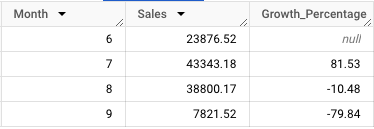

---

<H2> Stakeholder Communication </H2>

**Construct an email or slack message that is understandable to a product or business leader who is not familiar with your day-to-day work. Summarize the results of your investigation. Include:**
- **Key data quality issues and outstanding questions about the data**
- **One interesting trend in the data(Use a finding from part 2 or come up with a new insight)**
- **Request for action: explain what additional help, info, etc. you need to make sense of the data and resolve any outstanding issues**


Hi Ike Onyeador,

We have completed an initial analysis of our users, products, and transactions data. Below, I’ve summarized the key findings, data quality issues, and actionable next steps.

**Key Data Quality Issues:**
- Missing User Information: A significant percentage of user profiles lack critical data (e.g., birthdates, states, genders), hindering accurate segmentation and analysis.
- Product Data Inconsistencies: Categories and brands have a high number of missing or placeholder values, limiting product performance analysis.
- Transaction Data Issues: Duplicate records and mismatched barcodes between transaction and product tables suggest potential data entry or system errors.
- User ID Discrepancy: There’s a significant gap between the number of users in the Users table and those in the Transactions table, indicating missing transaction data for many users.

**Notable Trend:**
Even with data quality issues, we've identified a notable trend: daily revenue rose by 11.3% from June to July (from 1256 USD to 1398 USD). August's daily revenue was 1251 USD. We should investigate the cause of this July spike. (September data is incomplete.)

**Next Steps and Key Questions:**
To address these issues and ensure accurate reporting, we need your guidance on the following:

Users Table:
- Why are birthdates, states, and genders frequently missing? Can we make these fields mandatory or incentivize users to provide them?
- How can we standardize gender categories and define acceptable age ranges to address outliers?
- What is the root cause of the user count discrepancy between the Users and Transactions tables? Is it due to data integration, system errors, or business process gaps?

Products Table:
- Why are category, manufacturer, and brand data often missing? Can we enrich this data externally or improve collection processes?
- Why are placeholder values (e.g., for manufacturers and brands) being used, and how can we replace them with accurate data or "Unknown"?
- What are the procedures for assigning and validating barcodes? Can we implement validation rules to prevent missing, duplicate, or mismatched barcodes?

Transactions Table:
- What are the rules for handling duplicate RECEIPT_IDs with varying FINAL_QUANTITY, FINAL_SALE, and barcodes?
- Why do only 91 users from the Transactions table appear in Users? Why are there users in the Transactions table that are not in the Users table?
- How can we improve the matching rate between transaction barcodes and product barcodes?

Let me know a good time to discuss these findings and next steps.

Regards, </br>
Shashank Kashi